In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## How does decay rate vary with tau?

This gets confusing when we also consider the observed data with the embedded inverse relationship: If we calculate ln(k) = ln(A) - ln(t) and then regress ln(k) versus ln(t), then the result depends on any relationship between ln(A) and ln(t) (where ln(A) is -ln(M_out / M_in):

1) ln(A) is independent of t: gradient of regression = -1. But we also get a gradient of -1 when ln(A) is dependent on t, but as the increase in ln(t) is balanced by decrease in ln(k), there is no change in ln(A). Impossible to tell the difference between these two interpretations of no relation between ln(A) and t or a slope in k vs t of -1. Either way, would reject the exponential or Vollenweider model altogether, and look for other models to explain transmission vs t.
2) ln(A) varies with t but ln(k) doesn't. So ln(A) = ln(B) + c*ln(t), and c = 1, so overall the gradient of the regression = 0
3) ln(A) varies with t, A = kt^m: gradient of regression between -1 and 0 (or > 0)

So for net sink waterbodies, it's about how much we're between 0 (k independent of t) and -1 (pure spurious correlation).

But if we just look at the fitted coefficients it becomes simpler.

In [2]:
df = pd.read_csv(r'data/a_b_param_summary.csv')

# Drop the E2017 lines for plotting
df = df.loc[:2, :]

df

,Label,a,b
0,Catalan et al. (2016),0.38,-0.45
1,Vollenweider (this study),0.66,-0.73
2,Exp. decay (this study),0.50,-0.78


In [3]:
# For plotting, limit tau
tau_max = 20  # years

# Range of tau values
tau_min, tau_max = 0.0001, 100
tau = np.linspace(tau_min, tau_max, 10000)

# Null model  (coincidence that the coeffs are swapped compared to C2016?)
# N.B. coefficients for this were derived in notebook explore_catalan_vs_random_data.ipynb
k_null = np.exp((-0.96 * np.log(tau) - 0.45))

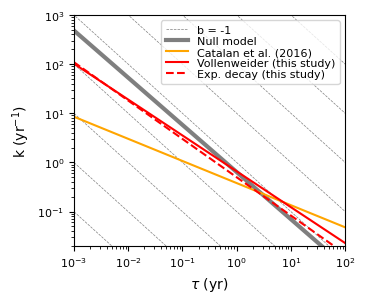

In [5]:
# Plot k (or sigma, in Vollenweider world) vs tau
fig, ax = plt.subplots(figsize=(3.5, 3))

color_li = ['orange', 'r', 'r', 'g', 'purple']
lw = 1.5

# Add diagonal gridlines with a slope of -1 (i.e. transmission independent of tau)
for i in range(-5, 5):
    if i == 0:
        plt.plot(tau, 10**i / tau, 'k--', lw=0.5, alpha=0.5, label='b = -1')
    else:
        plt.plot(tau, 10**i / tau, 'k--', lw=0.5, alpha=0.5)

# Null model (transmission independent of tau, for C2016 data)
plt.plot(tau, k_null, label='Null model', color='k', lw=3, alpha=0.5)

# Other fits
for i, (index, row) in enumerate(df.iterrows()):
    k = row['a'] * tau**row['b']
    label = row['Label']
    if label == 'Exp. decay (this study)':
        ls = '--'
    else:
        ls = '-'
    plt.plot(tau, k, label=label, color=color_li[i % len(color_li)], lw=lw, ls=ls)

ax.set_xlim(xmin=tau_min*10, xmax=tau_max)
ax.set_ylim(ymin=0.02, ymax=1000)
plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$\tau$ (yr)', fontsize=10)
plt.ylabel(r'k (yr$^{-1}$)', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

# plt.legend(bbox_to_anchor=(1.05, 1), fontsize=8, labelspacing=0.1)
plt.legend(fontsize=8, labelspacing=0.1, loc='upper right')

# Add the plot location label in bold text to the top right corner
# plt.text(0.12, 0.1, '(b)', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', ha='right', va='top')

# plt.tight_layout()
plt.savefig(r'graphs/fitted_k_vs_tau.png', bbox_inches='tight')
plt.show()

* Note that when the slope = -1, then there is no relationship between transmission and t any more:

    - If transmission = e^(-kt), then with k = at^-1, then transmission = e^-a. This appears to be the case for the Middelburg marine sediment OC data. Implies that the decline in reactivity exactly balances the increase in time, so that there is overall no difference in DOC transmission between waterbodies because of differences in time. Implications of this? Not worth using the exponential model any more to try to explain differences in transmission between sites.
    - If transmission = 1 / (1 + at^-1 * t), then transmission = 1 / (1 + a), i.e same as above

* If slope is 0, then conclude there is no relationship between k & t, go back to normal exponential decay or Vollenweider.
* If slope is inbetween, then we're somewhere between these two end points. Higher slope means k decreases more quickly with time, which means that you're more quickly left with unreactive materials, so that transmission will decrease more slowly with t (flatter curve) after the initial drop

Overall, small differences in fitted b parameters matter, as do confidence intervals on these to see whether they are significantly different.

# To do:
What about net production?